<a href="https://www.kaggle.com/code/shaiksohaik03/diabetes-ml-models?scriptVersionId=225558173" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score


In [2]:
# Load the dataset
data = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')

# Display the first few rows of the dataset
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [3]:
# Check for missing values
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [4]:
# Data Cleaning: Replace zero values with NaN for specific columns
data['Glucose'].replace(0, np.nan, inplace=True)
data['BloodPressure'].replace(0, np.nan, inplace=True)
data['SkinThickness'].replace(0, np.nan, inplace=True)
data['Insulin'].replace(0, np.nan, inplace=True)
data['BMI'].replace(0, np.nan, inplace=True)

# Impute missing values with the mean of each column
data.fillna(data.mean(), inplace=True)

# Display the summary statistics after cleaning
print(data.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.686763      72.405184      29.153420  155.548223   
std       3.369578   30.435949      12.096346       8.790942   85.021108   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.202592      29.153420  155.548223   
75%       6.000000  140.250000      80.000000      32.000000  155.548223   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.457464                  0.471876   33.240885    0.348958  
std      6.875151                  0.331329   11.760232    0.476951  
min     18.200000                  

/tmp/ipykernel_17/1057177620.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Glucose'].replace(0, np.nan, inplace=True)
/tmp/ipykernel_17/1057177620.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

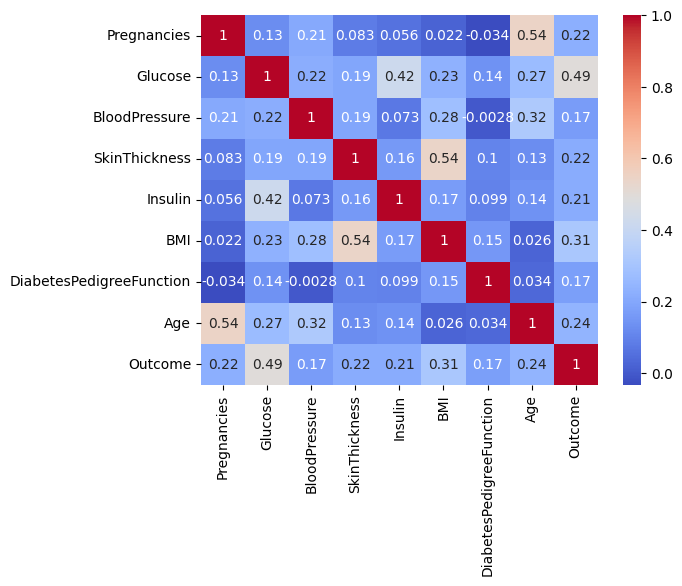

In [5]:
# Check correlations
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [6]:

# Define features and target variable
X = data.drop(columns=['Outcome'])
y = data['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [7]:
# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluation: Accuracy Score, Confusion Matrix, and Classification Report
print("Random Forest Accuracy: ", accuracy_score(y_test, y_pred_rf))
print("Random Forest:\n", classification_report(y_test, y_pred_rf))

# ROC Curve and AUC Score for Random Forest
y_pred_prob_rf = rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_prob_rf)


Random Forest Accuracy:  0.7447916666666666
Random Forest:
               precision    recall  f1-score   support

           0       0.82      0.76      0.79       123
           1       0.63      0.71      0.67        69

    accuracy                           0.74       192
   macro avg       0.73      0.74      0.73       192
weighted avg       0.75      0.74      0.75       192



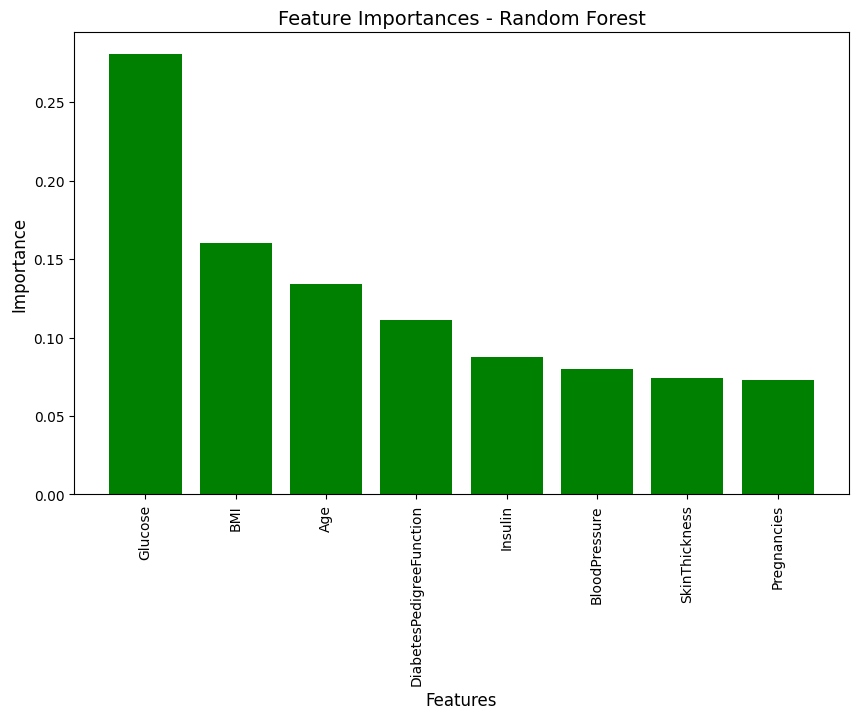

In [8]:

# Random Forest Feature Importance Plot
importances = rf_model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances - Random Forest", fontsize=14)
plt.bar(range(X.shape[1]), importances[indices], color="green", align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.show()



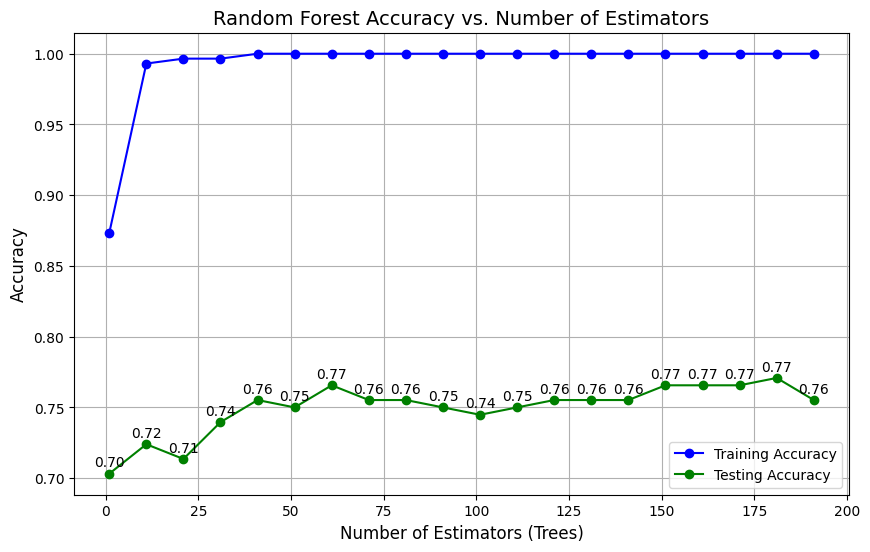

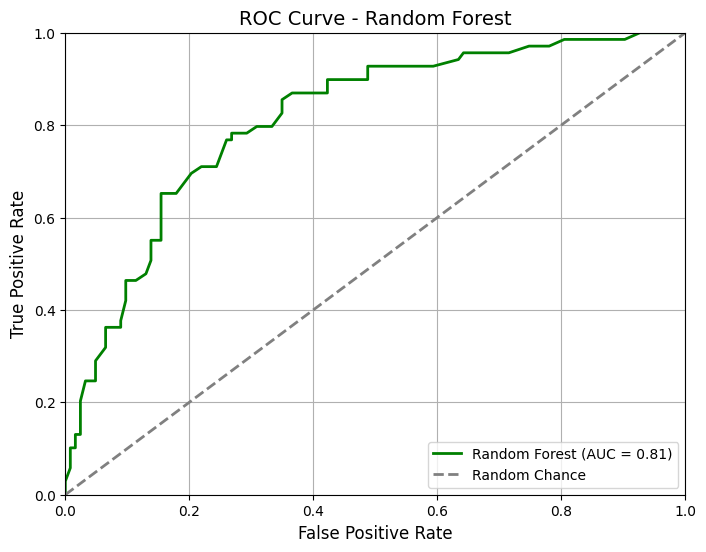

In [9]:

# Define the range of n_estimators to test
n_estimators_range = range(1, 201, 10)  # From 1 to 200 with a step of 10

# Initialize lists to store accuracy scores
train_accuracies = []
test_accuracies = []







# Loop through different numbers of trees in the forest
for n_estimators in n_estimators_range:
    rf_model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf_model.fit(X_train, y_train)
    
    # Calculate accuracy on training and testing data
    train_accuracy = accuracy_score(y_train, rf_model.predict(X_train))
    test_accuracy = accuracy_score(y_test, rf_model.predict(X_test))
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plot the accuracy scores
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, train_accuracies, label='Training Accuracy', marker='o', linestyle='-', color='blue')
plt.plot(n_estimators_range, test_accuracies, label='Testing Accuracy', marker='o', linestyle='-', color='green')

# Annotate the accuracy values on the plot
for i, txt in enumerate(test_accuracies):
    plt.annotate(f"{txt:.2f}", (n_estimators_range[i], test_accuracies[i]), textcoords="offset points", xytext=(0,5), ha='center')

# Add plot labels and title
plt.xlabel('Number of Estimators (Trees)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Random Forest Accuracy vs. Number of Estimators', fontsize=14)
plt.legend(loc='lower right', fontsize=10)
plt.grid(True)
plt.show()

# ROC Curve and AUC Plot for Random Forest
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='green', linestyle='-', linewidth=2, 
         label=f'Random Forest (AUC = {roc_auc_rf:.2f})')

# Diagonal line representing random chance
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', linewidth=2, label='Random Chance')

# Customizing plot appearance
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve - Random Forest', fontsize=14)
plt.legend(loc='lower right', fontsize=10)
plt.grid(True)
plt.show()








Logistic Regression Accuracy:  0.7291666666666666
Logistic Regression:
               precision    recall  f1-score   support

           0       0.78      0.80      0.79       123
           1       0.63      0.59      0.61        69

    accuracy                           0.73       192
   macro avg       0.71      0.70      0.70       192
weighted avg       0.73      0.73      0.73       192



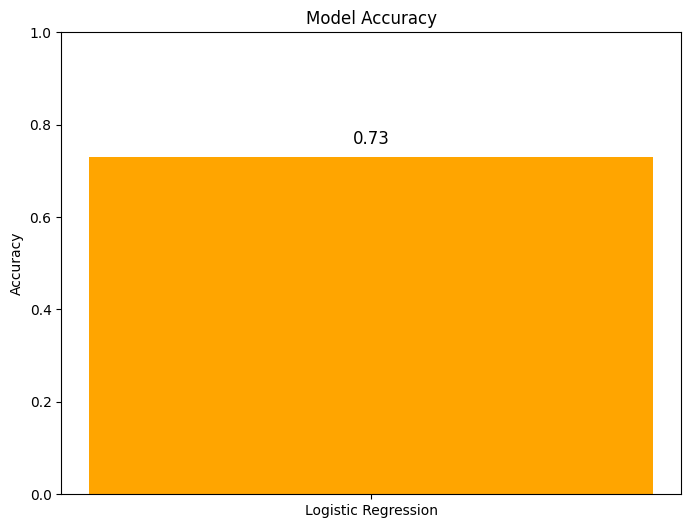

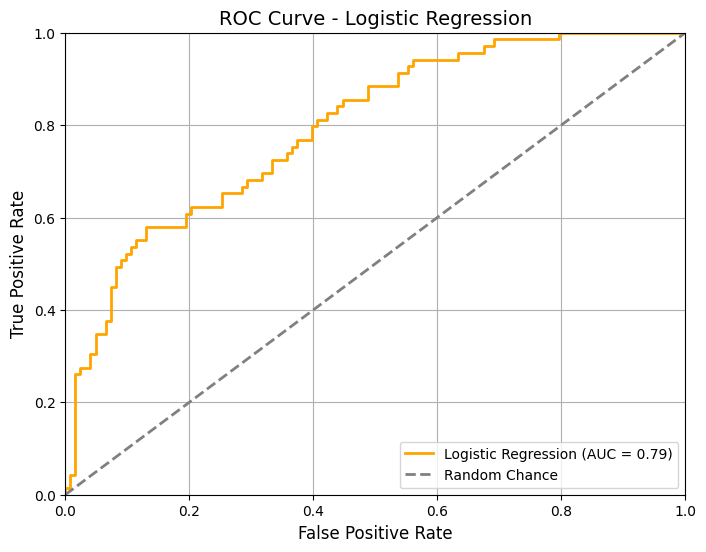

In [10]:


#Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Evaluation: Accuracy Score, Confusion Matrix, and Classification Report
accuracy = accuracy_score(y_test, y_pred_log_reg)
print("Logistic Regression Accuracy: ", accuracy)
print("Logistic Regression:\n", classification_report(y_test, y_pred_log_reg))

# ROC Curve and AUC Score for Logistic Regression
y_pred_prob_log_reg = log_reg.predict_proba(X_test)[:, 1]
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_pred_prob_log_reg)
roc_auc_log_reg = roc_auc_score(y_test, y_pred_prob_log_reg)

# Plot Accuracy
plt.figure(figsize=(8, 6))
bars = plt.bar(['Logistic Regression'], [accuracy], color='orange')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

# Annotate the bar with the accuracy value
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height + 0.02, f'{height:.2f}', 
             ha='center', va='bottom', fontsize=12, color='black')

plt.show()

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_log_reg, tpr_log_reg, color='orange', linestyle='-', linewidth=2, 
         label=f'Logistic Regression (AUC = {roc_auc_log_reg:.2f})')

# Diagonal line representing random chance
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', linewidth=2, label='Random Chance')

# Customizing plot appearance
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve - Logistic Regression', fontsize=14)
plt.legend(loc='lower right', fontsize=10)
plt.grid(True)
plt.show()



SVM Accuracy:  0.734375
SVM:
               precision    recall  f1-score   support

           0       0.78      0.82      0.80       123
           1       0.65      0.58      0.61        69

    accuracy                           0.73       192
   macro avg       0.71      0.70      0.70       192
weighted avg       0.73      0.73      0.73       192



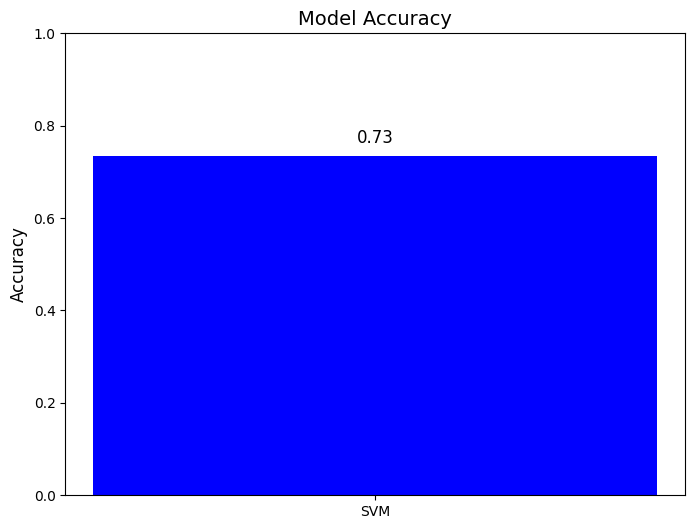

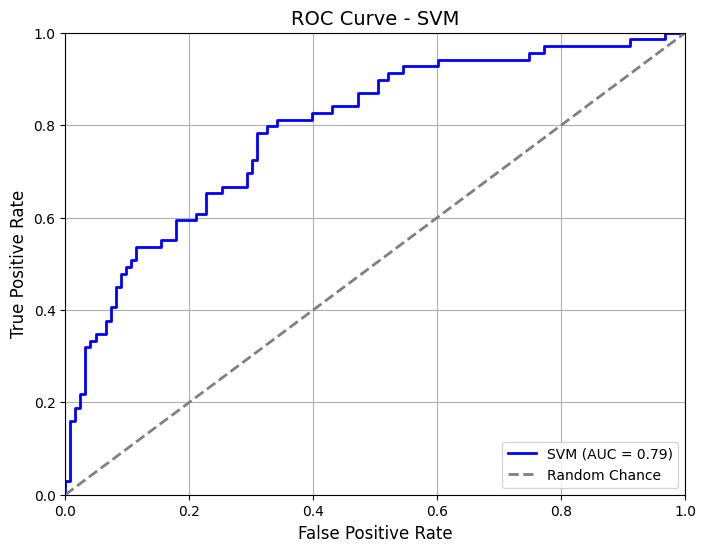

In [11]:

# Train the SVM model
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Evaluation: Accuracy Score and Classification Report
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy: ", accuracy_svm)
print("SVM:\n", classification_report(y_test, y_pred_svm))

# ROC Curve and AUC Score for SVM
y_pred_prob_svm = svm_model.predict_proba(X_test)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_prob_svm)
roc_auc_svm = roc_auc_score(y_test, y_pred_prob_svm)

# Accuracy Bar Plot for SVM
plt.figure(figsize=(8, 6))
plt.bar('SVM', accuracy_svm, color='blue')
plt.ylim([0, 1])
plt.ylabel('Accuracy', fontsize=12)
plt.title('Model Accuracy', fontsize=14)

# Add accuracy value on the bar
plt.text(0, accuracy_svm + 0.02, f'{accuracy_svm:.2f}', ha='center', va='bottom', fontsize=12)
plt.show()

# ROC Curve and AUC Plot for SVM
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='blue', linestyle='-', linewidth=2, 
         label=f'SVM (AUC = {roc_auc_svm:.2f})')

# Diagonal line representing random chance
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', linewidth=2, label='Random Chance')

# Customizing plot appearance
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve - SVM', fontsize=14)
plt.legend(loc='lower right', fontsize=10)
plt.grid(True)
plt.show()



KNN Accuracy:  0.7083333333333334
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.72      0.76       123
           1       0.58      0.68      0.63        69

    accuracy                           0.71       192
   macro avg       0.69      0.70      0.69       192
weighted avg       0.72      0.71      0.71       192



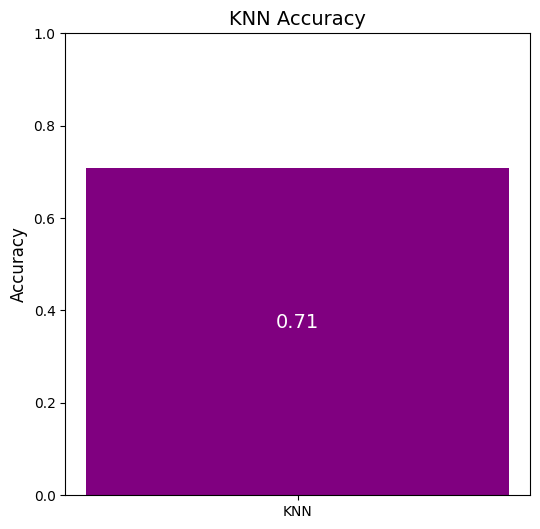

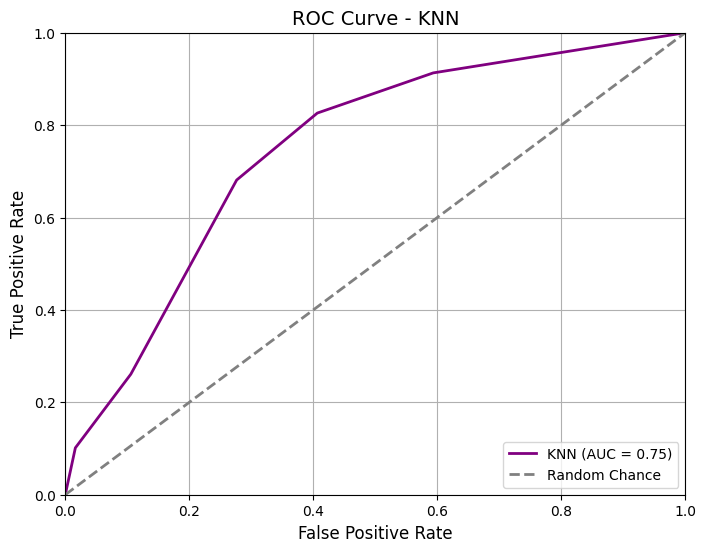

In [12]:

# Train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Calculate Accuracy
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy: ", knn_accuracy)
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))

# Plot the accuracy as a bar plot
plt.figure(figsize=(6, 6))
plt.bar(['KNN'], [knn_accuracy], color='purple')
plt.text(0, knn_accuracy / 2, f'{knn_accuracy:.2f}', ha='center', va='bottom', fontsize=14, color='white')
plt.ylim(0, 1)
plt.ylabel('Accuracy', fontsize=12)
plt.title('KNN Accuracy', fontsize=14)
plt.show()

# ROC Curve and AUC Plot for KNN
y_pred_prob_knn = knn.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_prob_knn)
roc_auc_knn = roc_auc_score(y_test, y_pred_prob_knn)

plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='purple', linestyle='-', linewidth=2, 
         label=f'KNN (AUC = {roc_auc_knn:.2f})')

# Diagonal line representing random chance
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', linewidth=2, label='Random Chance')

# Customizing plot appearance
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve - KNN', fontsize=14)
plt.legend(loc='lower right', fontsize=10)
plt.grid(True)
plt.show()





Logistic Regression Accuracy: 0.73
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.80      0.79       123
           1       0.63      0.59      0.61        69

    accuracy                           0.73       192
   macro avg       0.71      0.70      0.70       192
weighted avg       0.73      0.73      0.73       192

KNN Accuracy: 0.71
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.72      0.76       123
           1       0.58      0.68      0.63        69

    accuracy                           0.71       192
   macro avg       0.69      0.70      0.69       192
weighted avg       0.72      0.71      0.71       192

Random Forest Accuracy: 0.74
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.76      0.79       123
           1       0.63      0.71      0.67 

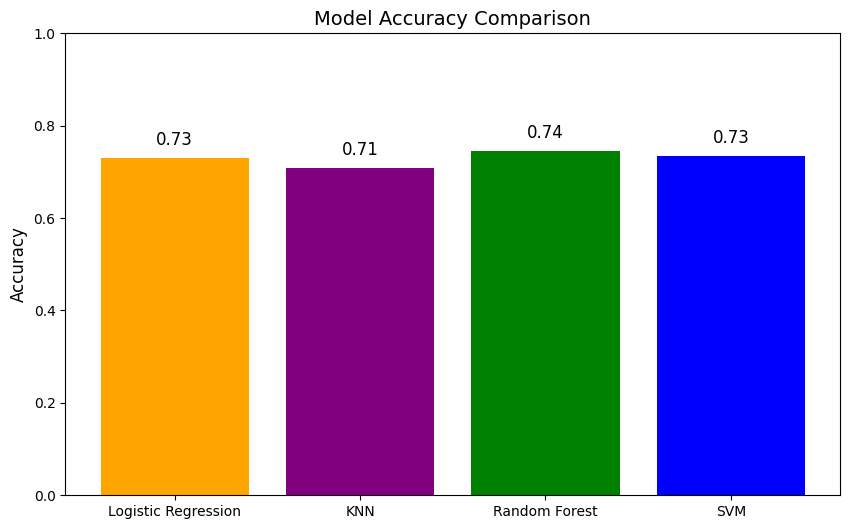

In [13]:


# Train the models
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}

accuracies = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.2f}")
    print(f"{name} Classification Report:\n", classification_report(y_test, y_pred))

# Plot Accuracy for all models
plt.figure(figsize=(10, 6))
bars = plt.bar(accuracies.keys(), accuracies.values(), color=['orange', 'purple', 'green', 'blue'])

# Highlight the best-performing model
best_model_name = max(accuracies, key=accuracies.get)
best_model_accuracy = accuracies[best_model_name]

# Add accuracy values on the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height + 0.02, f'{height:.2f}', 
             ha='center', va='bottom', fontsize=12, color='black')

# Highlight the best-performing model's bar
for bar in bars:
    if bar.get_label() == best_model_name:
        bar.set_color('red')  # Highlight best-performing model in red

plt.ylim(0, 1)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Model Accuracy Comparison', fontsize=14)

# Remove grid lines
plt.grid(False)

plt.show()